In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle


In [1]:
from google.colab import files

In [3]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"satryawpp","key":"8bfd7760074f28fbfbeee7b77d485762"}'}

In [4]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!ls ~/.kaggle

kaggle.json


In [6]:
!kaggle datasets download -d liqiang2022/gold-price-of-china-full-data-20152022

  0% 0.00/97.6k [00:00<?, ?B/s]
100% 97.6k/97.6k [00:00<00:00, 77.5MB/s]


In [7]:
!unzip gold-price-of-china-full-data-20152022.zip  -d harga_emas
!ls harga_emas

Archive:  gold-price-of-china-full-data-20152022.zip
  inflating: harga_emas/Gold-Au99_95.csv  
  inflating: harga_emas/gold_price_china.csv  
Gold-Au99_95.csv  gold_price_china.csv


In [8]:
df = pd.read_csv("harga_emas/Gold-Au99_95.csv")

In [14]:
df.head()

,ts_code,trade_date,close,Open,high,low,price_avg,change,pct_change,vol,amount
0,Au99.95,20221230,409.93,408.8,410.20,408.80,409.93,1.28,31.32,32.0,13118000
1,Au99.95,20221229,408.65,408.6,409.00,408.35,408.73,-0.21,-5.14,62.0,25341500
2,Au99.95,20221228,408.86,410.8,410.80,408.85,409.27,1.50,36.82,78.0,31923100
3,Au99.95,20221227,407.36,407.3,407.50,407.30,407.33,0.33,8.11,78.0,31771800
4,Au99.95,20221226,407.03,407.0,407.08,407.00,407.02,0.61,15.01,172.0,69961920


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1945 entries, 0 to 1944
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ts_code     1945 non-null   object 
 1   trade_date  1945 non-null   int64  
 2   close       1945 non-null   float64
 3   Open        1945 non-null   float64
 4   high        1945 non-null   float64
 5   low         1945 non-null   float64
 6   price_avg   1945 non-null   float64
 7   change      1945 non-null   float64
 8   pct_change  1944 non-null   float64
 9   vol         1945 non-null   float64
 10  amount      1945 non-null   int64  
dtypes: float64(8), int64(2), object(1)
memory usage: 167.3+ KB


In [12]:
df = df.rename(columns={'open': 'Open'})

In [ ]:
df["vol"] = df["vol"].astype("int64")

In [ ]:
df.describe()

,trade_date,close,Open,high,low,price_avg,change,pct_change,vol,amount
count,1.945000e+03,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1945.000000,1944.000000,1945.000000,1.945000e+03
mean,2.018559e+07,314.166185,314.008504,315.084380,312.960149,314.159398,0.086946,0.368256,1470.466838,3.980102e+08
std,2.289855e+04,59.774990,59.852263,59.910466,59.727861,59.771004,2.761372,12.221641,2117.075295,5.476264e+08
min,2.015010e+07,216.750000,183.990000,217.300000,183.990000,216.740000,-26.190000,-133.660000,2.000000,7.008000e+05
25%,2.016123e+07,268.750000,268.800000,269.500000,268.150000,268.730000,-1.200000,-0.412500,288.000000,1.030817e+08
50%,2.018123e+07,284.530000,284.500000,285.600000,283.600000,284.690000,0.090000,0.030000,746.000000,2.260832e+08
75%,2.020123e+07,374.940000,375.000000,376.000000,374.000000,374.960000,1.360000,0.470000,1824.000000,4.856242e+08
max,2.022123e+07,446.480000,445.000000,448.000000,445.000000,446.320000,17.990000,209.370000,30264.000000,7.534790e+09


<ipython-input-15-97cdbf7f1862>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

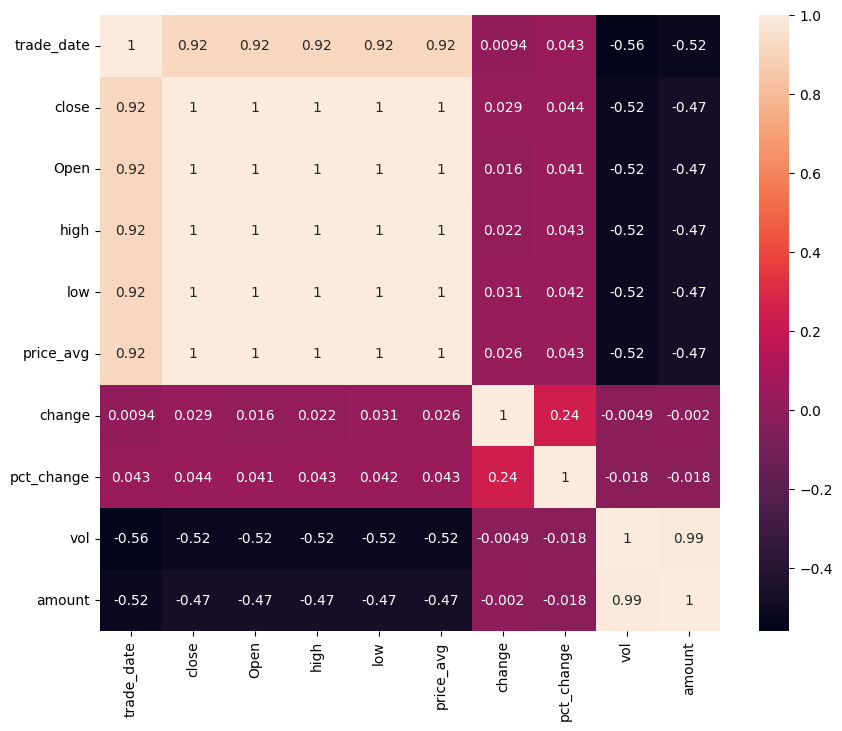

In [15]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

In [16]:
models = df.groupby('high').count()[['low']].sort_values(by='low',ascending=True).reset_index()
models = models.rename(columns={'low':'numberOflow'})

(array([   0,    1,    2, ..., 1273, 1274, 1275]),
 [Text(0, 0, '217.3'),
  Text(1, 0, '217.45'),
  Text(2, 0, '217.75'),
  Text(3, 0, '218.0'),
  Text(4, 0, '218.5'),
  Text(5, 0, '219.1'),
  Text(6, 0, '219.4'),
  Text(7, 0, '219.6'),
  Text(8, 0, '219.7'),
  Text(9, 0, '219.9'),
  Text(10, 0, '219.96'),
  Text(11, 0, '220.0'),
  Text(12, 0, '221.0'),
  Text(13, 0, '221.3'),
  Text(14, 0, '221.35'),
  Text(15, 0, '221.8'),
  Text(16, 0, '221.85'),
  Text(17, 0, '221.95'),
  Text(18, 0, '221.99'),
  Text(19, 0, '222.3'),
  Text(20, 0, '222.59'),
  Text(21, 0, '222.6'),
  Text(22, 0, '222.9'),
  Text(23, 0, '222.99'),
  Text(24, 0, '223.0'),
  Text(25, 0, '223.1'),
  Text(26, 0, '223.3'),
  Text(27, 0, '223.5'),
  Text(28, 0, '223.6'),
  Text(29, 0, '223.95'),
  Text(30, 0, '224.38'),
  Text(31, 0, '224.4'),
  Text(32, 0, '224.5'),
  Text(33, 0, '224.6'),
  Text(34, 0, '224.89'),
  Text(35, 0, '225.0'),
  Text(36, 0, '225.2'),
  Text(37, 0, '225.25'),
  Text(38, 0, '226.0'),
  Text(39,

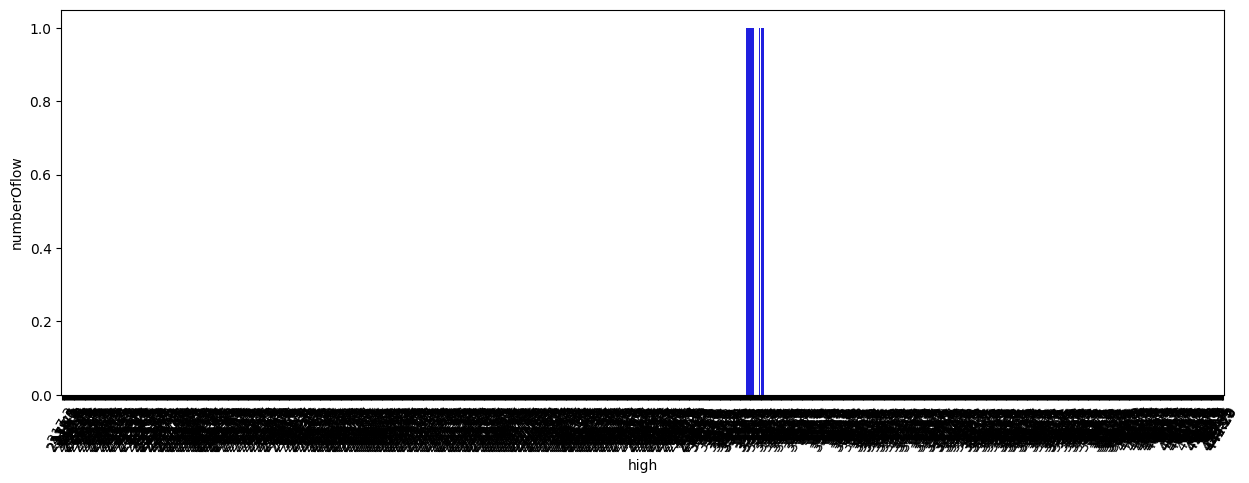

In [17]:
fig = plt.figure(figsize=(15,5))
sns.barplot(x=models['high'], y=models['numberOflow'][:20], color='blue')
plt.xticks(rotation=60)

In [18]:
Open = df.groupby('Open').count()[['change']].sort_values(by='change').reset_index()
Open = Open.rename(columns={'change':'count'})

<Axes: xlabel='Open', ylabel='count'>

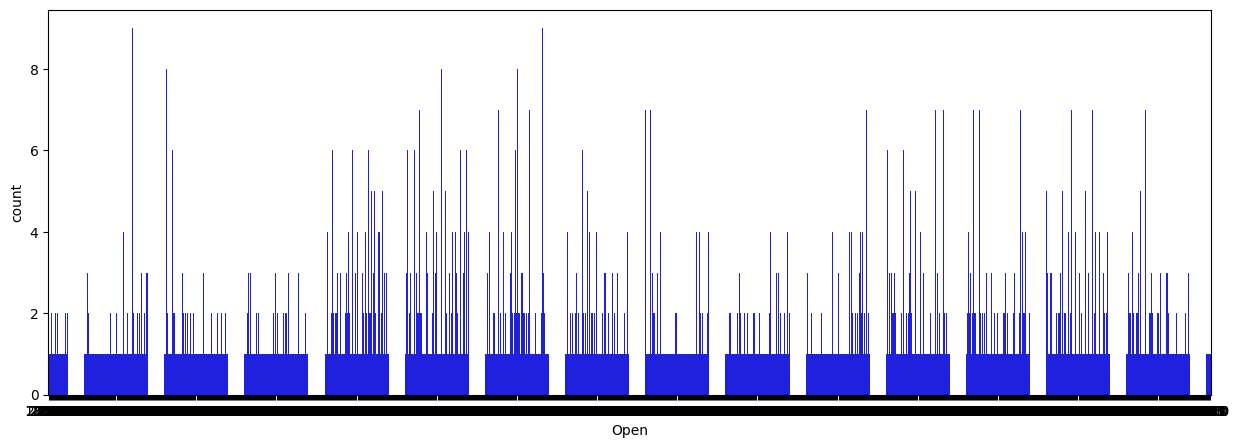

In [19]:
plt.figure(figsize=(15,5))
sns.barplot(x=Open['Open'], y=Open['count'], color='blue')

<ipython-input-20-f20114c6d03a>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['close'])


<Axes: xlabel='close', ylabel='Density'>

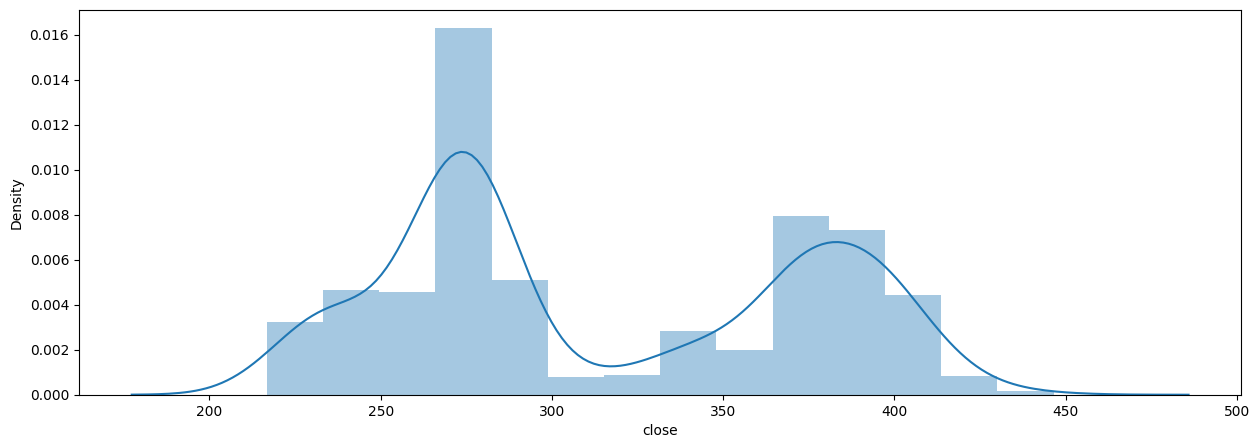

In [20]:
plt.figure(figsize=(15,5))
sns.distplot(df['close'])

<ipython-input-21-b76781d65429>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['high'])


<Axes: xlabel='high', ylabel='Density'>

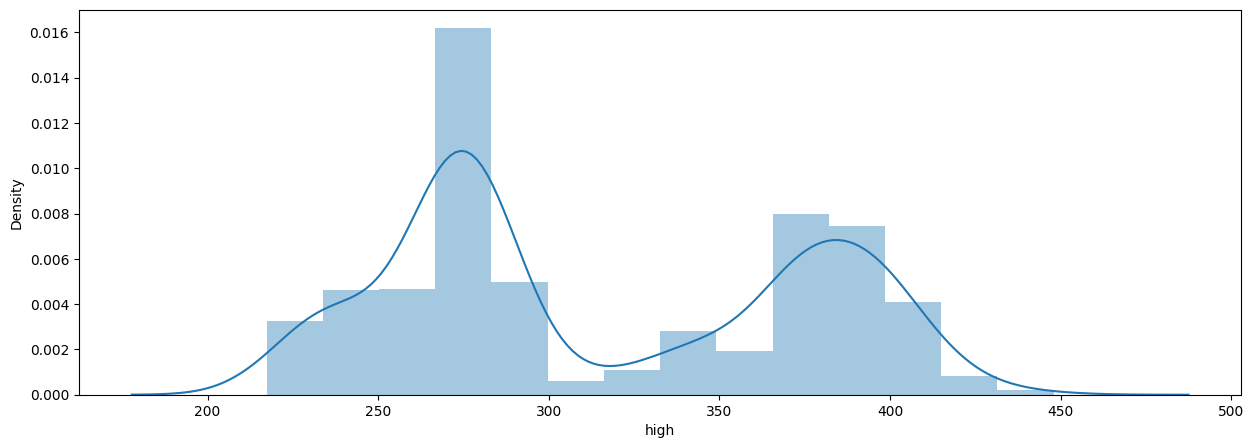

In [21]:
plt.figure(figsize=(15,5))
sns.distplot(df['high'])

In [22]:
features = ['trade_date','close','Open','high','low','change','vol','amount']
x = df[features]
y = df['price_avg']
x.shape, y.shape

((1945, 8), (1945,))

In [23]:
from sklearn.model_selection import train_test_split
x_train, X_test, y_train, y_test = train_test_split(x,y,random_state=70)
y_test.shape

(487,)

In [24]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)
pred = lr.predict(X_test)

In [25]:
score = lr.score(X_test, y_test)
print('akurasi model regresi linear =', score)

akurasi model regresi linear = 0.9999106570130815


In [26]:
#trade_date=20221230, close=409.93, open=408.8, high=410.20, low=408.80, change=1.28, vol=32.0, amount=13118000
input_data = np.array([[20221230,409.93,408.8,410.20,408.80,1.28,32.0,13118000]])

prediction = lr.predict(input_data)
print('Prediksi harga emas dalam yen :', prediction)

Prediksi harga emas dalam yen : [409.79857837]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [27]:
import pickle

filename = 'Prediksi_harga_emas.sav'
pickle.dump(lr,open(filename, 'wb'))